# PT Corin Mulia Gemilang - FastCon

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [3]:
# NLP tools
!pip install nltk Sastrawi

import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.8 MB/s eta 0:00:00


In [2]:
df_url = 'https://drive.google.com/uc?id=1Fu_c_5EjcOEuUZEJ4e4pYGapwOKA-i67'
df = pd.read_csv(df_url)
df

,title,url,stars,name,reviewUrl,text
0,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,"info pemesanan nya, PT corin ??"
1,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,keren fastcon! pengiriman aman dan cepat. bata...
2,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Profesional dan maju. Jaya untuk semua.
3,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
4,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Suda produksi apa belum pak
5,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,3,NaN,NaN,Ada kah loker admin do bos ?
6,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,oprator mixing
7,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,4,NaN,NaN,NaN
8,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Oke
9,PT Corin Mulia Gemilang - FastCon,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Jossss


/tmp/ipython-input-2514259381.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df, palette='viridis')


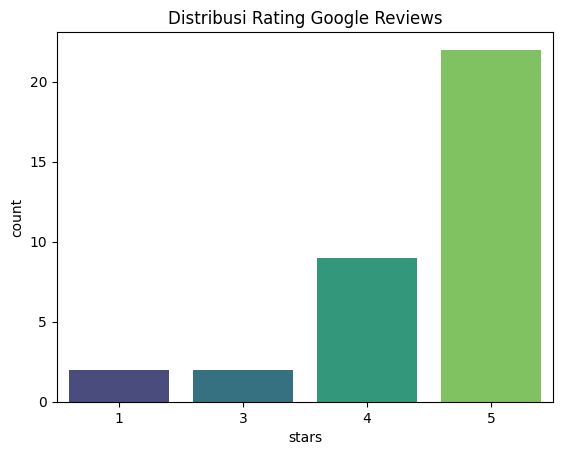

In [4]:
sns.countplot(x='stars', data=df, palette='viridis')
plt.title('Distribusi Rating Google Reviews')
plt.show()

In [5]:
df = df[['stars', 'text']]
df

,stars,text
0,5,"info pemesanan nya, PT corin ??"
1,5,keren fastcon! pengiriman aman dan cepat. bata...
2,5,Profesional dan maju. Jaya untuk semua.
3,5,NaN
4,5,Suda produksi apa belum pak
5,3,Ada kah loker admin do bos ?
6,5,oprator mixing
7,4,NaN
8,5,Oke
9,5,Jossss


### Preprocessing

In [6]:
# Hapus baris yang tidak punya teks
df = df.dropna(subset=['text'])

# Hilangkan duplikasi
df = df.drop_duplicates(subset=['text'])

# Bersihkan teks
def clean_basic(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)   # hapus URL
    text = re.sub(r"[^a-zA-Z\s]", ' ', text)             # hapus angka, simbol, emoji
    text = re.sub(r"\s+", ' ', text).strip()             # hilangkan spasi berlebih
    return text

df['clean_text'] = df['text'].apply(clean_basic)


In [7]:
normalisasi_dict = {
    'gk':'tidak', 'ga':'tidak', 'nggak':'tidak', 'ngga':'tidak',
    'bgt':'banget', 'bnyk':'banyak', 'yg':'yang', 'sdh':'sudah',
    'udh':'sudah', 'dgn':'dengan', 'klo':'kalau', 'dlm':'dalam',
    'dr':'dari', 'tp':'tapi', 'dg':'dengan', 'tdk':'tidak',
    'trs':'terus', 'aja':'saja', 'bisa':'bisa', 'oke':'ok',
    'mantappp':'mantap', 'mantapp':'mantap'
}

def normalize_text(text):
    tokens = text.split()
    tokens = [normalisasi_dict.get(word, word) for word in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['clean_text'].apply(normalize_text)

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Bisa tambah kata tidak penting yang sering muncul di review
extra_stopwords = {'pak', 'bu', 'pt', 'nya', 'nih', 'aja', 'banget'}
stop_words.update(extra_stopwords)

def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df

,stars,text,clean_text
0,5,"info pemesanan nya, PT corin ??",info pemesanan corin
1,5,keren fastcon! pengiriman aman dan cepat. bata...,keren fastcon pengiriman aman cepat batanya ku...
2,5,Profesional dan maju. Jaya untuk semua.,profesional maju jaya
4,5,Suda produksi apa belum pak,suda produksi
5,3,Ada kah loker admin do bos ?,kah loker admin do bos
6,5,oprator mixing,oprator mixing
8,5,Oke,ok
9,5,Jossss,jossss
10,4,kok banyak foto mesin panen padi??,foto mesin panen padi
11,5,Good place,good place


## labelling

In [10]:
def label_sentiment(star):
    if star <= 2:
        return 'negatif'
    elif star == 3:
        return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['stars'].apply(label_sentiment)

In [11]:
df

,stars,text,clean_text,sentimen
0,5,"info pemesanan nya, PT corin ??",info pemesanan corin,positif
1,5,keren fastcon! pengiriman aman dan cepat. bata...,keren fastcon pengiriman aman cepat batanya ku...,positif
2,5,Profesional dan maju. Jaya untuk semua.,profesional maju jaya,positif
4,5,Suda produksi apa belum pak,suda produksi,positif
5,3,Ada kah loker admin do bos ?,kah loker admin do bos,netral
6,5,oprator mixing,oprator mixing,positif
8,5,Oke,ok,positif
9,5,Jossss,jossss,positif
10,4,kok banyak foto mesin panen padi??,foto mesin panen padi,positif
11,5,Good place,good place,positif


/tmp/ipython-input-3794044591.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimen', palette='coolwarm')


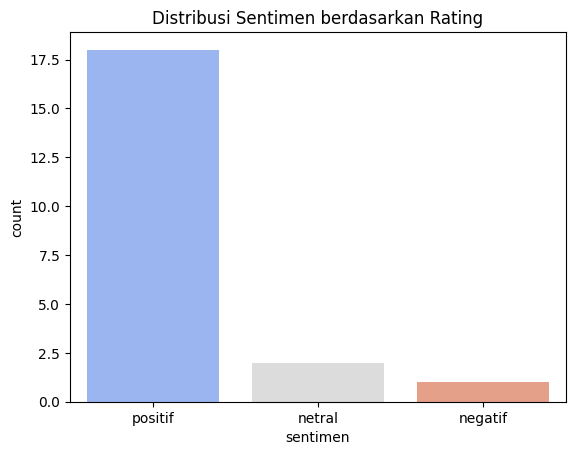

In [12]:
sns.countplot(data=df, x='sentimen', palette='coolwarm')
plt.title('Distribusi Sentimen berdasarkan Rating')
plt.show()

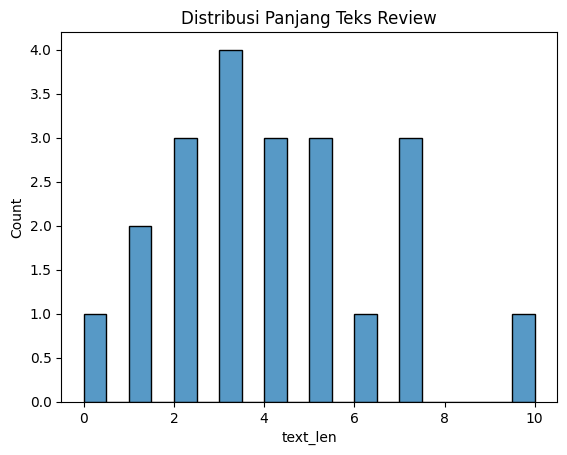

In [13]:
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(df['text_len'], bins=20)
plt.title('Distribusi Panjang Teks Review')
plt.show()

In [15]:
positive_text = " ".join(df[df['sentimen']=='positif']['clean_text'])
neutral_text = " ".join(df[df['sentimen']=='netral']['clean_text'])
negative_text = " ".join(df[df['sentimen']=='negatif']['clean_text'])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [17]:
# Gabungkan semua teks jadi satu string besar
all_words = " ".join(df['clean_text'])

# Pisahkan jadi list kata
tokens = all_words.split()

# Hitung frekuensi
word_freq = Counter(tokens)

# Ambil 20 kata paling sering
common_words = word_freq.most_common(20)

# Ubah ke DataFrame agar mudah divisualisasi
freq_df = pd.DataFrame(common_words, columns=['word', 'count'])

/tmp/ipython-input-2199374355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


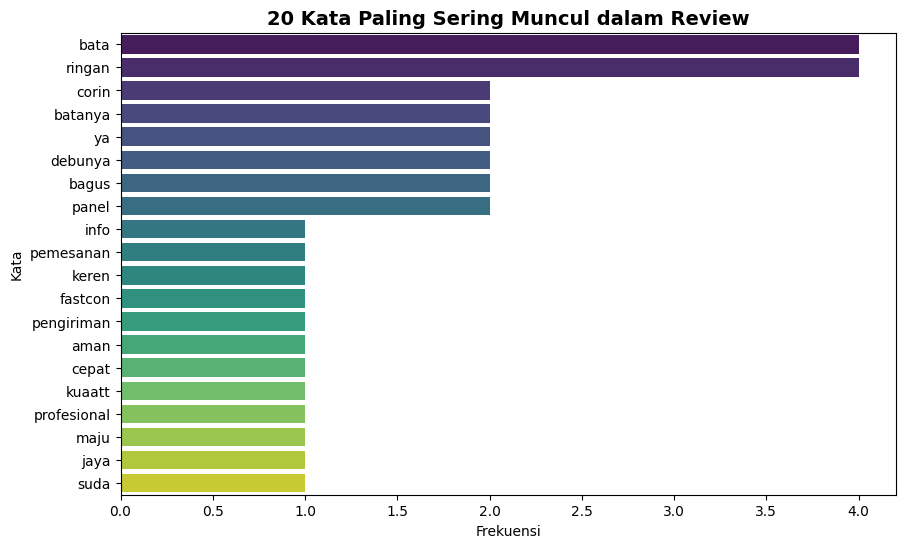

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=freq_df, palette='viridis')
plt.title('20 Kata Paling Sering Muncul dalam Review', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

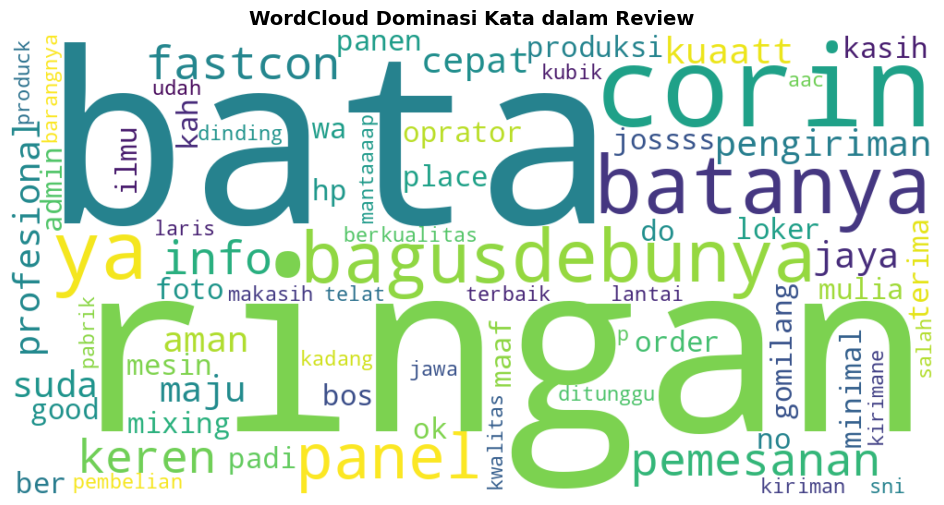

In [19]:
wc = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Dominasi Kata dalam Review', fontsize=14, fontweight='bold')
plt.show()

In [20]:
def plot_ngram_wordcloud(corpus, n=2, title='Bigram WordCloud', bg_color='white', cmap='viridis'):
    """
    Membuat WordCloud berdasarkan n-gram (bigram, trigram, dll)
    """
    # Buat n-gram vectorizer
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(corpus)

    # Hitung frekuensi kata
    freqs = X.toarray().sum(axis=0)
    vocab = vectorizer.get_feature_names_out()
    freq_dict = dict(zip(vocab, freqs))

    # Buat WordCloud
    wc = WordCloud(width=800, height=400, background_color=bg_color, colormap=cmap)
    wc.generate_from_frequencies(freq_dict)

    # Plot
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{title} ({n}-gram)", fontsize=14, fontweight='bold')
    plt.show()

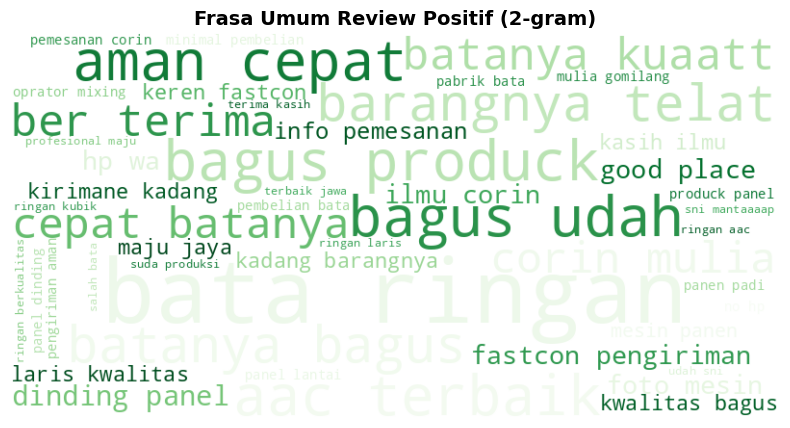

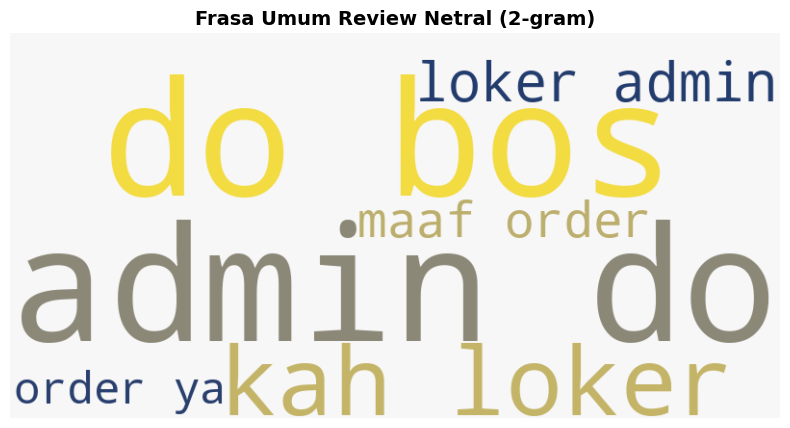

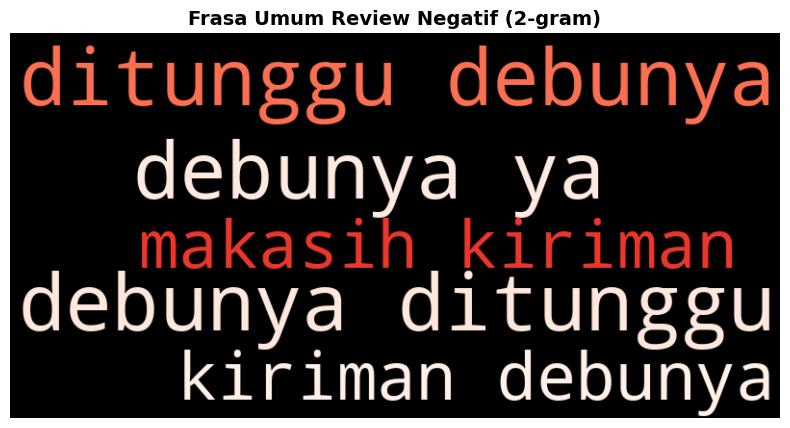

In [21]:
# Dataset hasil preprocessing
positive_corpus = df[df['sentimen']=='positif']['clean_text']
neutral_corpus  = df[df['sentimen']=='netral']['clean_text']
negative_corpus = df[df['sentimen']=='negatif']['clean_text']

# Bigram WordCloud (2-gram)
plot_ngram_wordcloud(positive_corpus, n=2, title='Frasa Umum Review Positif', bg_color='white', cmap='Greens')
plot_ngram_wordcloud(neutral_corpus, n=2, title='Frasa Umum Review Netral', bg_color='#f7f7f7', cmap='cividis')
plot_ngram_wordcloud(negative_corpus, n=2, title='Frasa Umum Review Negatif', bg_color='black', cmap='Reds')

# (Opsional) Trigram (3 kata)
# plot_ngram_wordcloud(positive_corpus, n=3, title='Trigram Review Positif')

# PT Prawira Daya Sakti & PT. Garuda Mitra Abadi jaya

In [22]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [23]:
# NLP tools
!pip install nltk Sastrawi

import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [24]:
# Ubah link drive ke format raw file
url1 = 'https://drive.google.com/uc?id=1cGvUo1HyruLHyQg6gpssB81Zs_Jymlp7'
url2 = 'https://drive.google.com/uc?id=1HgYFiBlFcSBV1IDpEPzCdbY_vEZQEZ04'

# Contoh pembacaan dengan pandas
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

df1

,title,url,stars,name,reviewUrl,text
0,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,"Tempatnya yang bagus, karyawannya ramah serta ..."
1,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,apakah ada lowongan operator forklift
2,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
3,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
4,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,2,NaN,NaN,Ada nomer yg bisa d hubungi\nNomer kantor sela...
5,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
6,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
7,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Bagus
8,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
9,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Good


In [25]:
df2

,title,url,stars,name,reviewUrl,text
0,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,"Barang yang dijual berkualitas, brand produk n..."
1,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
2,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,3,NaN,NaN,Ora bongkar gudange penuh
3,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
4,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
5,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Distributor berbagai macam bahan bangunan di p...
6,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Distributor Keramik 👍
7,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Lengkap dan bersahabat
8,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,keramiknya lengkap 👌💯
9,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN


In [26]:
import pandas as pd

# Gabungkan baris dari df1 dan df2
df3 = pd.concat([df1, df2], ignore_index=True)

# (Opsional) hapus duplikat jika ada
df3 = df3.drop_duplicates()

df3


,title,url,stars,name,reviewUrl,text
0,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,"Tempatnya yang bagus, karyawannya ramah serta ..."
1,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,apakah ada lowongan operator forklift
2,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
4,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,2,NaN,NaN,Ada nomer yg bisa d hubungi\nNomer kantor sela...
7,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Bagus
9,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,Good
10,PT Prawira Daya Sakti,https://www.google.com/maps/search/?api=1&quer...,1,NaN,NaN,NaN
15,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,"Barang yang dijual berkualitas, brand produk n..."
16,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,5,NaN,NaN,NaN
17,PT. Garuda Mitra Abadi jaya,https://www.google.com/maps/search/?api=1&quer...,3,NaN,NaN,Ora bongkar gudange penuh


/tmp/ipython-input-3490001508.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=df3, palette='viridis')


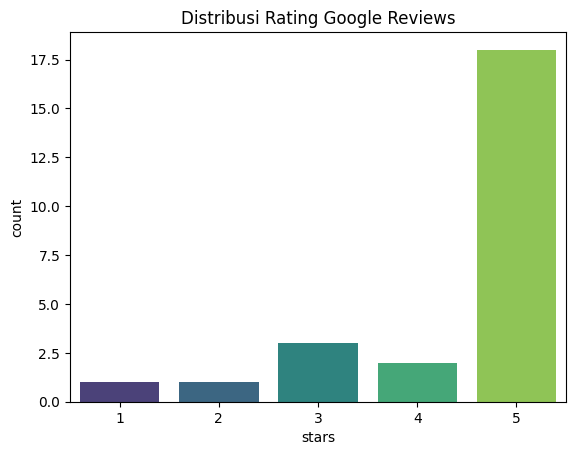

stars
5    18
3     3
4     2
1     1
2     1
Name: count, dtype: int64


In [27]:
sns.countplot(x='stars', data=df3, palette='viridis')
plt.title('Distribusi Rating Google Reviews')
plt.show()

print(df3['stars'].value_counts())

### Preprocessing

In [28]:
# Hapus baris yang tidak punya teks
df3 = df3.dropna(subset=['text'])

# Hilangkan duplikasi
df3 = df3.drop_duplicates(subset=['text'])

# Bersihkan teks
def clean_basic(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)   # hapus URL
    text = re.sub(r"[^a-zA-Z\s]", ' ', text)             # hapus angka, simbol, emoji
    text = re.sub(r"\s+", ' ', text).strip()             # hilangkan spasi berlebih
    return text

df3['clean_text'] = df3['text'].apply(clean_basic)

In [29]:
normalisasi_dict = {
    'gk':'tidak', 'ga':'tidak', 'nggak':'tidak', 'ngga':'tidak',
    'bgt':'banget', 'bnyk':'banyak', 'yg':'yang', 'sdh':'sudah',
    'udh':'sudah', 'dgn':'dengan', 'klo':'kalau', 'dlm':'dalam',
    'dr':'dari', 'tp':'tapi', 'dg':'dengan', 'tdk':'tidak',
    'trs':'terus', 'aja':'saja', 'bisa':'bisa', 'oke':'ok',
    'mantappp':'mantap', 'mantapp':'mantap'
}

def normalize_text(text):
    tokens = text.split()
    tokens = [normalisasi_dict.get(word, word) for word in tokens]
    return ' '.join(tokens)

df3['clean_text'] = df3['clean_text'].apply(normalize_text)

In [30]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Bisa tambah kata tidak penting yang sering muncul di review
extra_stopwords = {'pak', 'bu', 'pt', 'nya', 'nih', 'aja', 'banget'}
stop_words.update(extra_stopwords)

def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df3['clean_text'] = df3['clean_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## labelling

In [31]:
def label_sentiment(star):
    if star <= 2:
        return 'negatif'
    elif star == 3:
        return 'netral'
    else:
        return 'positif'

df3['sentimen'] = df3['stars'].apply(label_sentiment)

In [32]:
positive_text = " ".join(df3[df3['sentimen']=='positif']['clean_text'])
neutral_text = " ".join(df3[df3['sentimen']=='netral']['clean_text'])
negative_text = " ".join(df3[df3['sentimen']=='negatif']['clean_text'])

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [34]:
# Gabungkan semua teks jadi satu string besar
all_words = " ".join(df3['clean_text'])

# Pisahkan jadi list kata
tokens = all_words.split()

# Hitung frekuensi
word_freq = Counter(tokens)

# Ambil 20 kata paling sering
common_words = word_freq.most_common(20)

# Ubah ke DataFrame agar mudah divisualisasi
freq_df = pd.DataFrame(common_words, columns=['word', 'count'])

/tmp/ipython-input-2199374355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='viridis')


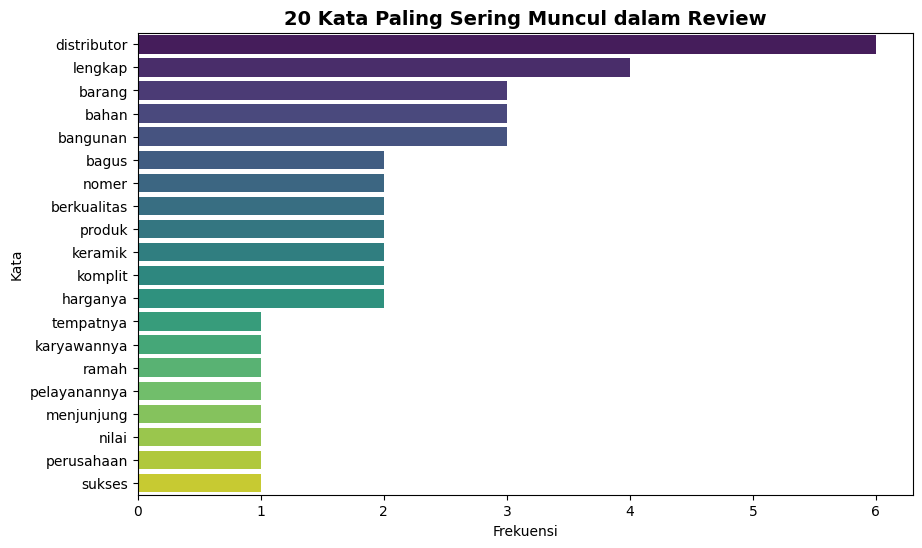

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=freq_df, palette='viridis')
plt.title('20 Kata Paling Sering Muncul dalam Review', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

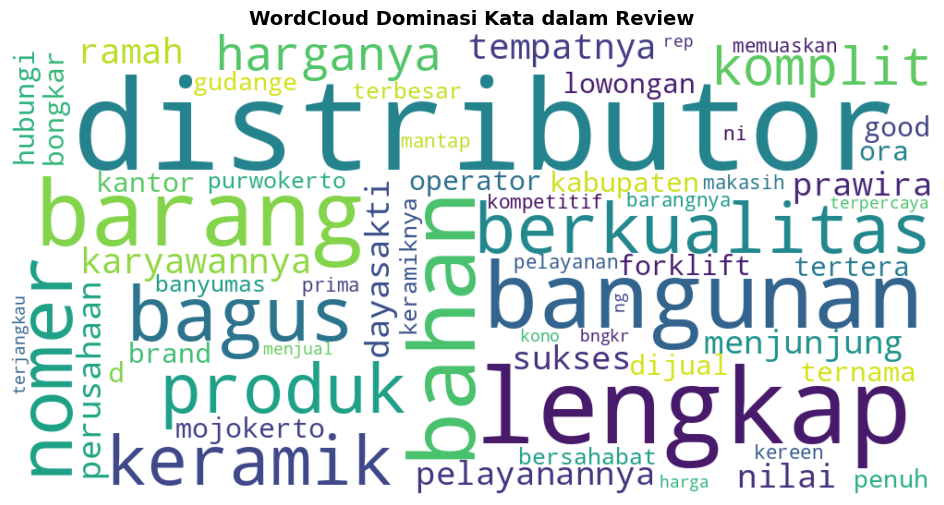

In [36]:
wc = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Dominasi Kata dalam Review', fontsize=14, fontweight='bold')
plt.show()

/tmp/ipython-input-1408608244.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df3, x='sentimen', palette='coolwarm')


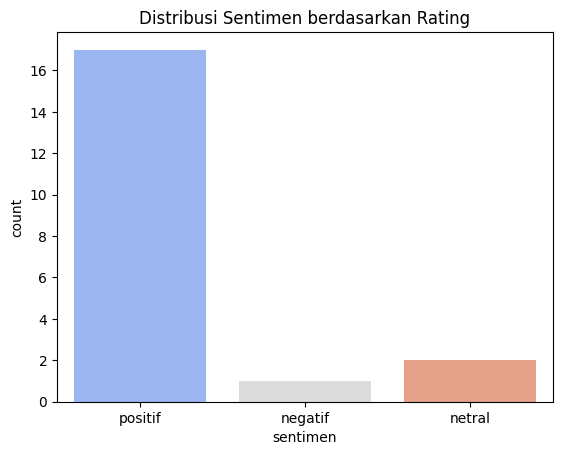

In [37]:
sns.countplot(data=df3, x='sentimen', palette='coolwarm')
plt.title('Distribusi Sentimen berdasarkan Rating')
plt.show()